In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from IPython.display import display, HTML
import datetime
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

display(HTML(data="""
<style>
    div#notebook-container    { width: 100%; }
</style>
"""))
plt.rcParams['figure.figsize'] = [16,4]

In [2]:
ds = pd.read_excel('Data.xlsx')


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 26 columns):
S.NO                           591 non-null int64
WARD                           591 non-null int64
PID                            591 non-null object
BID                            591 non-null object
HOUSE.NO                       428 non-null object
FLOOR.NO                       591 non-null int64
TYPE OF PREMISES               591 non-null object
OWNERSHIP STATUS               432 non-null object
SHOP.NO                        62 non-null object
TRADE LIC                      99 non-null object
SUB TYPE COMMERCIAL            244 non-null object
SUB TYPE RESIDENTIAL           322 non-null object
RUNNING STATUS                 591 non-null object
REGISTERED STATUS              369 non-null object
BUILDING COLOR                 591 non-null object
TAX METHOD                     591 non-null object
AREA                           409 non-null float64
Signage_1                      1

In [4]:
ds.head()

,S.NO,WARD,PID,BID,HOUSE.NO,FLOOR.NO,TYPE OF PREMISES,OWNERSHIP STATUS,SHOP.NO,TRADE LIC,SUB TYPE COMMERCIAL,SUB TYPE RESIDENTIAL,RUNNING STATUS,REGISTERED STATUS,BUILDING COLOR,TAX METHOD,AREA,Signage_1,Signage_2,Signage_3,SignageArea_1,SignageArea_2,SignageArea_3,TOTAL SIGN BOARD,TOTAL SIGN BOARD AREA SQMT,TYPE OF BUILDING
0,1,8,A1_1_8_1001,1_8_1001,NaN,0,COMMERCIAL,SELF OWNED,116,T/O/3015,SHOP,NaN,OPEN,YES,Blue,AREA,3.909,PAINT,NaN,NaN,1.000,NaN,NaN,1,1.000,PATRA
1,2,8,A1_1_8_1002,1_8_1002,NaN,0,COMMERCIAL,NaN,NaN,NaN,SHOP,NaN,CLOSED,NaN,YELLOW,AREA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000,PATRA
2,3,8,A1_1_8_1003,1_8_1003,8/03/238/,0,COMMERCIAL,SELF OWNED,102,T/O/3040,School,NaN,OPEN,YES,Green,AREA,5.570,PAINT,OTHERS,NaN,2.000,NaN,0.82,2,2.820,PATRA
3,4,8,A2_1_8_1004,1_8_1004,8/269/,0,COMMERCIAL,SELF OWNED,NaN,T/O/5696,SHOP,NaN,OPEN,YES,Yellow,AREA,5.842,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000,PATRA
4,5,8,A1_1_ 8_1004,1_8_1004,8/269/1,0,COMMERCIAL,SELF OWNED,NaN,NaN,SHOP,NaN,OPEN,YES,yellow,AREA,2.887,OTHERS,NaN,NaN,0.296,NaN,NaN,1,0.296,PATRA


### Cleaning 'Building Colour' column

In [5]:
ds.groupby(['BUILDING COLOR']).size()

BUILDING COLOR
Blue                 3
Blue                 4
Green                2
Green                6
ORANGE             198
Pink                 4
Purple               1
Purple               5
RED                 47
Red and yellow       1
WHITE               12
White               20
White               31
White and red        1
YELLOW              61
Yellow               3
Yellow              15
Yellow and red       5
black                1
blue                13
blue                 6
brown                7
candy color          1
cream               17
cream colour         1
faded orange         1
green                6
green                2
green and red        1
green and white      1
grey                 1
light pink           1
mild green           1
old colour           1
orange               6
orange               1
pink                18
pink                 6
purple               1
purple               1
white               29
white                7
yello              

#### There are lot of repeated values in 'Building Color' catagory

In [6]:
## Converting to string format
ds['BUILDING COLOR']  = ds['BUILDING COLOR'].astype('str')
ds['BUILDING COLOR']  = ds['BUILDING COLOR'].apply(lambda x: x.upper())
ds['BUILDING COLOR']  = ds['BUILDING COLOR'].apply(lambda x: x.replace(" ",''))
ds['BUILDING COLOR']  = ds['BUILDING COLOR'].apply(lambda x: x.replace("AND",' & '))

In [7]:
ds.groupby(['BUILDING COLOR']).size()

BUILDING COLOR
BLACK              1
BLUE              26
BROWN              7
C & YCOLOR         1
CREAM             17
CREAMCOLOUR        1
FADEDORANGE        1
GREEN             16
GREEN & RED        1
GREEN & WHITE      1
GREY               1
LIGHTPINK          1
MILDGREEN          1
OLDCOLOUR          1
ORANGE           205
PINK              28
PURPLE             8
RED               47
RED & YELLOW       1
WHITE             99
WHITE & RED        1
YELLO              1
YELLOE             1
YELLOS             1
YELLOW           118
YELLOW & RED       5
dtype: int64

In [8]:
ds['BUILDING COLOR']  = ds['BUILDING COLOR'].apply(lambda x: 'YELLOW' if ((x == 'YELLO') or (x == 'YELLOE') or (x == 'YELLOS')) else x)
ds['BUILDING COLOR']  = ds['BUILDING COLOR'].apply(lambda x: 'CREAM' if (x == 'CREAMCOLOUR') else x)

In [9]:
ds.groupby(['BUILDING COLOR']).size()

BUILDING COLOR
BLACK              1
BLUE              26
BROWN              7
C & YCOLOR         1
CREAM             18
FADEDORANGE        1
GREEN             16
GREEN & RED        1
GREEN & WHITE      1
GREY               1
LIGHTPINK          1
MILDGREEN          1
OLDCOLOUR          1
ORANGE           205
PINK              28
PURPLE             8
RED               47
RED & YELLOW       1
WHITE             99
WHITE & RED        1
YELLOW           121
YELLOW & RED       5
dtype: int64

#### 2. Checking and cleaning 'TYPE OF PREMISES' column

In [10]:
ds.groupby(['TYPE OF PREMISES']).size()

TYPE OF PREMISES
COMMERCIAL             234
GOVERNMENT PROPERTY     11
RELIGIOUS                3
RESIDENTIAL            342
RESIDENTIAL              1
dtype: int64

In [11]:
ds['TYPE OF PREMISES']  = ds['TYPE OF PREMISES'].apply(lambda x: 'RESIDENTIAL' if ('RESIDENTIAL' in x) else x)

In [12]:
ds.groupby(['TYPE OF PREMISES']).size()

TYPE OF PREMISES
COMMERCIAL             234
GOVERNMENT PROPERTY     11
RELIGIOUS                3
RESIDENTIAL            343
dtype: int64

In [13]:
a = 'qwer a'
if ' ' in a:
    print ('yes')

yes


#### 3. Checking and cleaning 'SUB TYPE COMMERCIAL' column

In [14]:
ds.groupby(['SUB TYPE COMMERCIAL']).size()

SUB TYPE COMMERCIAL
AUTOMOBIE                 1
CHAMBERS                  2
ELECTRICAL                1
ENGINEERING               1
Financial                 2
Goldsmith                 5
JEWELERY                  1
MACHINERY                 1
MEDICINE                  1
OFFICE                   11
SERVICE AND PRODUCTS      1
SHOP                    211
STEEL                     1
School                    1
Survey Consultant         1
THERAPIST                 1
WATER SOLUTION            1
WOOD SHOP                 1
dtype: int64

In [15]:
ds['SUB TYPE COMMERCIAL']  = ds['SUB TYPE COMMERCIAL'].astype('str')
ds['SUB TYPE COMMERCIAL']  = ds['SUB TYPE COMMERCIAL'].apply(lambda x: x.upper())
ds['SUB TYPE COMMERCIAL']  = ds['SUB TYPE COMMERCIAL'].apply(lambda x: np.nan if x== 'NAN' else x)

In [16]:
ds.groupby(['SUB TYPE COMMERCIAL']).size()

SUB TYPE COMMERCIAL
AUTOMOBIE                 1
CHAMBERS                  2
ELECTRICAL                1
ENGINEERING               1
FINANCIAL                 2
GOLDSMITH                 5
JEWELERY                  1
MACHINERY                 1
MEDICINE                  1
OFFICE                   11
SCHOOL                    1
SERVICE AND PRODUCTS      1
SHOP                    211
STEEL                     1
SURVEY CONSULTANT         1
THERAPIST                 1
WATER SOLUTION            1
WOOD SHOP                 1
dtype: int64

In [17]:
ds.groupby(['TYPE OF BUILDING']).size()

TYPE OF BUILDING
OPEN PLOT               1
PATRA                  35
RCC                   400
RCC/ROOF HOUSE         59
ROOF HOUSE             88
UNDER CONSTRUCTION      8
dtype: int64

In [18]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 26 columns):
S.NO                           591 non-null int64
WARD                           591 non-null int64
PID                            591 non-null object
BID                            591 non-null object
HOUSE.NO                       428 non-null object
FLOOR.NO                       591 non-null int64
TYPE OF PREMISES               591 non-null object
OWNERSHIP STATUS               432 non-null object
SHOP.NO                        62 non-null object
TRADE LIC                      99 non-null object
SUB TYPE COMMERCIAL            244 non-null object
SUB TYPE RESIDENTIAL           322 non-null object
RUNNING STATUS                 591 non-null object
REGISTERED STATUS              369 non-null object
BUILDING COLOR                 591 non-null object
TAX METHOD                     591 non-null object
AREA                           409 non-null float64
Signage_1                      1

In [19]:
ds.groupby(['Signage_1']).size()

Signage_1
0         46
GLASS      1
GLOSSY    21
OTHERS    39
PAINT     27
dtype: int64

In [20]:
ds['Signage_1']  = ds['Signage_1'].apply(lambda x: np.nan if x== 0 else x)
ds.groupby(['Signage_1']).size()

Signage_1
GLASS      1
GLOSSY    21
OTHERS    39
PAINT     27
dtype: int64

In [21]:
ds.groupby(['Signage_2']).size(), ds.groupby(['Signage_3']).size()

(Signage_2
 0         46
 GLOSSY     4
 OTHERS     9
 PAINT      7
 dtype: int64, Signage_3
 0         46
 GLOSSY     3
 OTHERS     1
 PAINT      1
 dtype: int64)

In [22]:
ds['Signage_2']  = ds['Signage_2'].apply(lambda x: np.nan if x == 0 else x)
ds['Signage_3']  = ds['Signage_3'].apply(lambda x: np.nan if x == 0 else x)

In [23]:
ds.groupby(['Signage_2']).size(), ds.groupby(['Signage_3']).size()

(Signage_2
 GLOSSY    4
 OTHERS    9
 PAINT     7
 dtype: int64, Signage_3
 GLOSSY    3
 OTHERS    1
 PAINT     1
 dtype: int64)

In [24]:
ds.groupby(['REGISTERED STATUS']).size()

REGISTERED STATUS
YES    369
dtype: int64

In [25]:
ds['REGISTERED STATUS'] = ds['REGISTERED STATUS'].fillna('No')
ds.groupby(['REGISTERED STATUS']).size()

REGISTERED STATUS
No     222
YES    369
dtype: int64

In [26]:
#ds.to_excel('DataClean.xlsx')

## Iniating Prediction Process

In [27]:
dsRes = ds[ds['TYPE OF PREMISES'] == 'RESIDENTIAL']
dsCom = ds[ds['TYPE OF PREMISES'] == 'COMMERCIAL']
dsGov = ds[ds['TYPE OF PREMISES'] == 'GOVERNMENT PROPERTY']
dsRel = ds[ds['TYPE OF PREMISES'] == 'RELIGIOUS']



In [30]:
own = ds.groupby(['OWNERSHIP STATUS']).size()
own

OWNERSHIP STATUS
RENTED         42
SELF OWNED    390
dtype: int64

In [33]:
rent_tot = own['RENTED']
self_tot = own['SELF OWNED']
own['RENTED']

42

In [34]:
ownCom = dsCom.groupby(['OWNERSHIP STATUS']).size()
ownCom

OWNERSHIP STATUS
RENTED         40
SELF OWNED    127
dtype: int64

In [35]:
percent_rent = 100*ownCom[0]/len(dsCom)
percent_rent

17.094017094017094

In [36]:
percent_self = 100*ownCom[1]/len(dsCom)
percent_self

54.27350427350427

#### Percentage division between the permises 

In [37]:
percent_Res = 100* len(dsRes)/len(ds)
percent_Com = 100* len(dsCom)/len(ds)
percent_Gov = 100* len(dsGov)/len(ds)
percent_Relig = 100* len(dsRel)/len(ds)
percent_Res, percent_Com, percent_Gov, percent_Relig

(58.03722504230119, 39.59390862944162, 1.8612521150592216, 0.5076142131979695)

#### Area division between the premises

In [55]:
area_tot = sum(ds[ds['AREA'].notnull()]['AREA'])
area_res = sum(dsRes[dsRes['AREA'].notnull()]['AREA'])
area_com = sum(dsCom[dsCom['AREA'].notnull()]['AREA'])
area_gov = sum(dsGov[dsGov['AREA'].notnull()]['AREA'])
area_rel = sum(dsRel[dsRel['AREA'].notnull()]['AREA'])

In [70]:
area_tot, area_res, area_com, area_gov, area_rel

(11184.201010965193, 8014.693898027899, 2734.283112937283, 235.224, 200.0)

In [57]:
dsRel['AREA'].notnull()

19      True
212    False
242    False
Name: AREA, dtype: bool

In [58]:
area_Pres = round(100*area_res/area_tot,2)
area_Pcom = round(100*area_com/area_tot,2)
area_Pgov = round(100*area_gov/area_tot,2)
area_Prel = round(100*area_rel/area_tot,2)

In [59]:
area_Pres, area_Pcom, area_Pgov, area_Prel

(71.66, 24.45, 2.1, 1.79)

In [72]:
#### Finding number of permises whose 'AREA' data is given
area_counttot = sum(ds['AREA'].notnull())
area_countres = sum(dsRes['AREA'].notnull())
area_countcom = sum(dsCom['AREA'].notnull())
area_countgov = sum(dsGov['AREA'].notnull())
area_countrel = sum(dsRel['AREA'].notnull())
area_counttot, area_countres, area_countcom, area_countgov, area_countrel

(409, 237, 170, 1, 1)

In [62]:
avgarea_res = area_res/area_countres
avgarea_com = area_com/area_countcom
avgarea_gov = area_gov/area_countgov
avgarea_rel = area_rel/area_countrel

In [64]:
avgarea_res, avgarea_com, avgarea_gov, avgarea_rel

(33.817273831341346, 16.084018311395784, 235.224, 200.0)

In [38]:
### 1. Of all the permises 58% are residential permises, 40% are commercial permises, 2% are governemnt permises
### 2. Of all commercial permises 17% are rented, 55% are self-owned
### 3. Avg area for resideny = 33.8, commercial = 16.08, Gov = 235.22, Rel = 200


In [68]:
### Total Area Prediction
res_totarea = avgarea_res*len(dsRes)
com_totarea = avgarea_com*len(dsCom)
gov_totarea = avgarea_gov*len(dsGov)
rel_totarea = avgarea_rel*len(dsRel)

In [69]:
res_totarea, com_totarea, gov_totarea, rel_totarea

(11599.324924150082, 3763.6602848666134, 2587.464, 600.0)

In [71]:
area_res, area_com, area_gov, area_rel

(8014.693898027899, 2734.283112937283, 235.224, 200.0)

In [73]:
len(dsCom), len(dsRes), len(dsGov), len(dsRel)

(234, 343, 11, 3)

### Analysing Commercial Premises

#### Relating Total Sign Board Area with Premises Area

In [122]:
## Extracting where 'AREA' is not null
dscom2 = dsCom[dsCom['AREA'].notnull()]
print(len(dscom2))
dscom_Mis = dscom2[dscom2['TOTAL  SIGN BOARD AREA SQMT'] == 0.0]
## Removing Datapoints for Missing 'TotalSIgnBoardArea' data
dscom2 = dscom2[dscom2['TOTAL  SIGN BOARD AREA SQMT'] != 0.0]
dscom2 = dscom2.sort_values(by= ['AREA']).reset_index(drop = True)

170


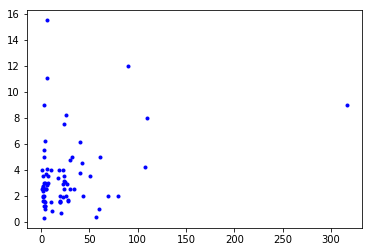

In [98]:
area = dscom2['AREA']
sbarea = dscom2['TOTAL  SIGN BOARD AREA SQMT']
plt.plot(area, sbarea, 'b.')
                

### Using Sklearn Library to generate a linear model between them

In [99]:
from sklearn.linear_model import LinearRegression

C:\Users\manje_000\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\manje_000\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


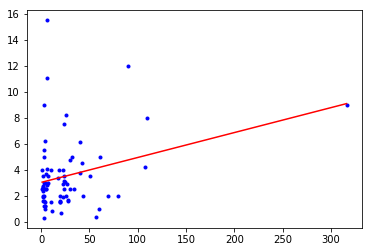

In [102]:
regr = LinearRegression()
regr.fit(area.reshape(-1,1), sbarea)
plt.plot(area, sbarea, 'b.', area, regr.predict(area.reshape(-1,1)), 'r-')

In [101]:
regr.coef_

array([0.01918301])

#### Predicting Missing Values for 'total SignBoard Area'

In [104]:
areaMis = dscom_Mis['AREA']

C:\Users\manje_000\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


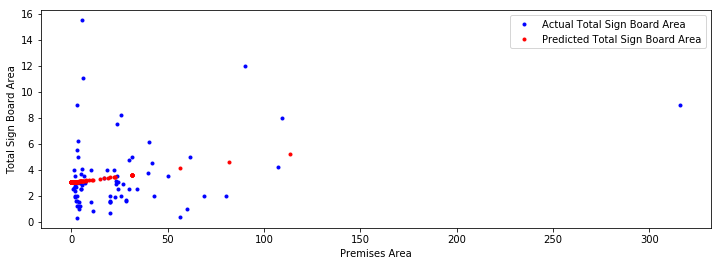

In [123]:
plt.rcParams['figure.figsize'] = [12,4]
plt.plot(area, sbarea, 'b.',label="Actual Total Sign Board Area")
plt.plot(areaMis, regr.predict(areaMis.reshape(-1,1)), 'r.', label="Predicted Total Sign Board Area")
plt.xlabel('Premises Area')
plt.ylabel('Total Sign Board Area')
plt.legend()
plt.savefig('Predict.png')

In [121]:
len(area), len(areaMis), len(dscom2)

(74, 96, 74)